In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from pandas import DataFrame
from bioinfokit.analys import stat 
%matplotlib inline

In [3]:
df=pd.read_csv('data_set.csv')
df

,Unnamed: 0,rank,year,movie,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors,main,number_of_stars,director_main,number_of_directors,production_companies_main,number_of_production_companies
0,0,1,2009,Avatar,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,Action,"['Dune-Entertainment', '20th-Century-Fox', 'In...",5.0,9.041786e+08,"['Sam Worthington', 'Zoe Saldana']",['James Cameron'],Sam Worthington,2,James Cameron,1,Dune-Entertainment,3
1,1,2,2019,Avengers: Endgame,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),Action,['Marvel-Studios'],7.0,8.583730e+08,"['Robert Downey, Jr.', 'Chris Evans', 'Mark Ru...","['Joe Russo', 'Anthony Russo']","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1
2,2,3,1997,Titanic,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),Drama,"['20th-Century-Fox', 'Paramount-Pictures', 'Li...",2.0,1.247411e+09,"['Leonardo DiCaprio', 'Kate Winslet']",['James Cameron'],Leonardo DiCaprio,2,James Cameron,1,20th-Century-Fox,3
3,3,4,2015,Star Wars Ep. VII: The Force Awakens,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,Adventure,"['Lucasfilm', 'Bad-Robot']",4.0,1.012399e+09,"['Adam Driver', 'Daisy Ridley', 'John Boyega']",['J.J. Abrams'],Adam Driver,3,J.J. Abrams,1,Lucasfilm,2
4,4,5,2018,Avengers: Infinity War,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,Action,['Marvel-Studios'],18.0,6.825411e+08,"['Robert Downey, Jr.', 'Chris Hemsworth', 'Mar...","['Joe Russo', 'Anthony Russo']","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,2008,Cloverfield,1.713022e+08,80048433.0,9.125379e+07,/movie/Cloverfield,Action,['Bad-Robot'],NaN,NaN,[],[],NaN,0,NaN,0,Bad-Robot,1
996,996,997,2002,Mr. Deeds,1.712695e+08,126293452.0,4.497608e+07,/movie/Mr-Deeds,Comedy,"['Columbia-Pictures', 'New-Line-Cinema', 'Happ...",489.0,1.991133e+08,[],[],NaN,0,NaN,0,Columbia-Pictures,4
997,997,998,2010,The Other Guys,1.709365e+08,119219978.0,5.171649e+07,/movie/Other-Guys-The-(2010),Comedy,"['Gary-Sanchez-Productions', 'Mosaic-Media', '...",882.0,1.384100e+08,"['Will Ferrell', 'Mark Wahlberg']",['Adam McKay'],Will Ferrell,2,Adam McKay,1,Gary-Sanchez-Productions,3
998,998,999,2011,Zookeeper,1.708055e+08,80360866.0,9.044466e+07,/movie/Zookeeper,Romantic-Comedy,"['Columbia-Pictures', 'Metro-Goldwyn-Mayer-Pic...",NaN,NaN,['Kevin James'],['Frank Coraci'],Kevin James,1,Frank Coraci,1,Columbia-Pictures,5


In [4]:
df=df.set_index('movie')
df.head()

,Unnamed: 0,rank,year,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,infl_gross_box_office,actors,directors,main,number_of_stars,director_main,number_of_directors,production_companies_main,number_of_production_companies
movie,,,,,,,,,,,,,,,,,,,
Avatar,0,1,2009,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,Action,"['Dune-Entertainment', '20th-Century-Fox', 'In...",5.0,9.041786e+08,"['Sam Worthington', 'Zoe Saldana']",['James Cameron'],Sam Worthington,2,James Cameron,1,Dune-Entertainment,3
Avengers: Endgame,1,2,2019,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),Action,['Marvel-Studios'],7.0,8.583730e+08,"['Robert Downey, Jr.', 'Chris Evans', 'Mark Ru...","['Joe Russo', 'Anthony Russo']","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1
Titanic,2,3,1997,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),Drama,"['20th-Century-Fox', 'Paramount-Pictures', 'Li...",2.0,1.247411e+09,"['Leonardo DiCaprio', 'Kate Winslet']",['James Cameron'],Leonardo DiCaprio,2,James Cameron,1,20th-Century-Fox,3
Star Wars Ep. VII: The Force Awakens,3,4,2015,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,Adventure,"['Lucasfilm', 'Bad-Robot']",4.0,1.012399e+09,"['Adam Driver', 'Daisy Ridley', 'John Boyega']",['J.J. Abrams'],Adam Driver,3,J.J. Abrams,1,Lucasfilm,2
Avengers: Infinity War,4,5,2018,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,Action,['Marvel-Studios'],18.0,6.825411e+08,"['Robert Downey, Jr.', 'Chris Hemsworth', 'Mar...","['Joe Russo', 'Anthony Russo']","Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1


### Converting all box office data per millions so its easier interpretability

In [5]:
df_2=df.assign(ww_per_million = df.wwbox_office/1000000, domestic_per_million = df.dombox_office/1000000, 
           int_per_million = df.internationalbox_office/1000000, infl_gross_per_million=df.infl_gross_box_office/1000000 )

df_2.describe()

,Unnamed: 0,year,wwbox_office,dombox_office,internationalbox_office,inflation_rank,infl_gross_box_office,number_of_stars,number_of_directors,number_of_production_companies,ww_per_million,domestic_per_million,int_per_million,infl_gross_per_million
count,1000.000000,1000.000000,1.000000e+03,9.810000e+02,9.980000e+02,696.000000,6.960000e+02,1000.000000,1000.000000,1000.000000,1000.000000,981.000000,998.000000,696.000000
mean,499.500000,2006.943000,3.981776e+08,1.546546e+08,2.469554e+08,420.125000,2.726120e+08,1.576000,0.825000,2.592000,398.177600,154.654561,246.955387,272.612019
std,288.819436,10.577411,2.873821e+08,1.080147e+08,2.025513e+08,270.842379,1.535753e+08,1.213135,0.551978,1.641411,287.382069,108.014693,202.551258,153.575254
min,0.000000,1937.000000,1.705527e+08,6.752000e+03,2.870000e+07,1.000000,1.259948e+08,0.000000,0.000000,1.000000,170.552719,0.006752,28.700000,125.994811
25%,249.750000,2001.000000,2.170461e+08,9.071062e+07,1.213633e+08,189.500000,1.726394e+08,0.000000,1.000000,1.000000,217.046104,90.710620,121.363279,172.639381
50%,499.500000,2009.000000,3.003869e+08,1.277069e+08,1.825516e+08,394.500000,2.238369e+08,2.000000,1.000000,2.000000,300.386858,127.706877,182.551644,223.836943
75%,749.250000,2015.000000,4.625218e+08,1.840311e+08,2.941195e+08,632.250000,3.224766e+08,3.000000,1.000000,3.000000,462.521816,184.031112,294.119511,322.476632
max,999.000000,2021.000000,2.845900e+09,9.366622e+08,2.085392e+09,995.000000,1.505274e+09,3.000000,3.000000,20.000000,2845.899541,936.662225,2085.391916,1505.273746


In [6]:
#rounding box office data to 2 decimal places for easy interpretation
df3=df_2.round(2)
df3.head()
# df3.describe()
# df3.corr()



,Unnamed: 0,rank,year,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,...,main,number_of_stars,director_main,number_of_directors,production_companies_main,number_of_production_companies,ww_per_million,domestic_per_million,int_per_million,infl_gross_per_million
movie,,,,,,,,,,,,,,,,,,,,,
Avatar,0,1,2009,2.845900e+09,760507625.0,2.085392e+09,/movie/Avatar,Action,"['Dune-Entertainment', '20th-Century-Fox', 'In...",5.0,...,Sam Worthington,2,James Cameron,1,Dune-Entertainment,3,2845.90,760.51,2085.39,904.18
Avengers: Endgame,1,2,2019,2.797801e+09,858373000.0,1.939428e+09,/movie/Avengers-Endgame-(2019),Action,['Marvel-Studios'],7.0,...,"Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1,2797.80,858.37,1939.43,858.37
Titanic,2,3,1997,2.207987e+09,659363944.0,1.548623e+09,/movie/Titanic-(1997),Drama,"['20th-Century-Fox', 'Paramount-Pictures', 'Li...",2.0,...,Leonardo DiCaprio,2,James Cameron,1,20th-Century-Fox,3,2207.99,659.36,1548.62,1247.41
Star Wars Ep. VII: The Force Awakens,3,4,2015,2.064616e+09,936662225.0,1.127954e+09,/movie/Star-Wars-Ep-VII-The-Force-Awakens,Adventure,"['Lucasfilm', 'Bad-Robot']",4.0,...,Adam Driver,3,J.J. Abrams,1,Lucasfilm,2,2064.62,936.66,1127.95,1012.40
Avengers: Infinity War,4,5,2018,2.044541e+09,678815482.0,1.365725e+09,/movie/Avengers-Infinity-War,Action,['Marvel-Studios'],18.0,...,"Robert Downey, Jr.",3,Joe Russo,2,Marvel-Studios,1,2044.54,678.82,1365.73,682.54


<AxesSubplot:>

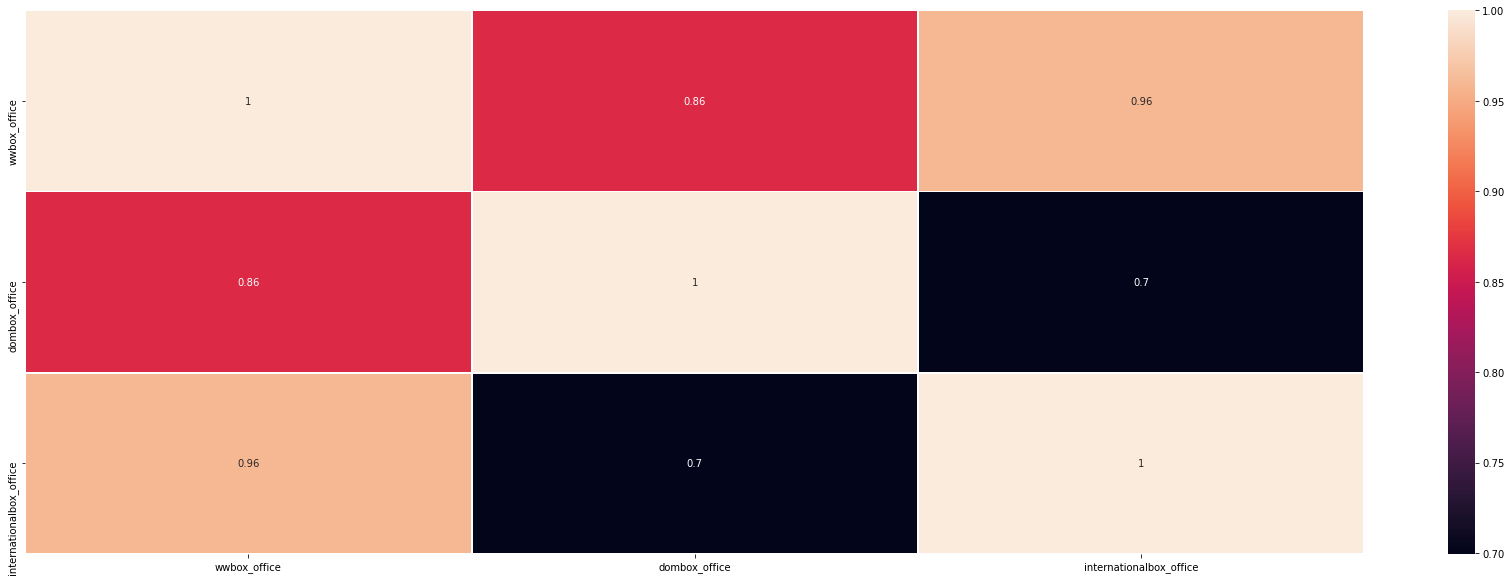

In [7]:
corr_new=df3.corr().loc['wwbox_office':'internationalbox_office', 'wwbox_office':'internationalbox_office']
#corr_new
plt.figure(figsize = (30,10))
sns.heatmap(df3.corr().loc['wwbox_office':'internationalbox_office', 'wwbox_office':'internationalbox_office'], annot = True, fmt='.2g', linewidths=1)

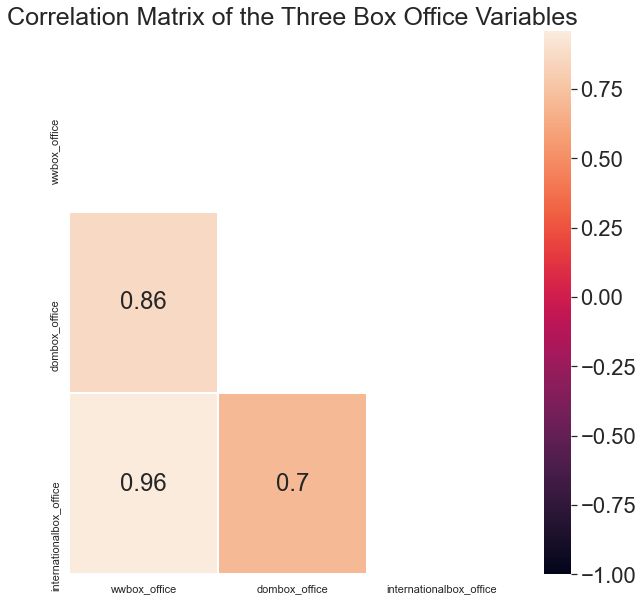

In [8]:
mask = np.zeros_like(corr_new, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style='white') 
plt.figure(figsize = (10,10))
plt.title("Correlation Matrix of the Three Box Office Variables", fontdict={"fontsize": 25})

sns.set(font_scale=2) 
sns.heatmap(corr_new, vmin=-1, annot=True, linewidths=1, mask = mask, )
pass

In [9]:
#checking summary stats for Domestic and International

indep_var=df3[["domestic_per_million", "int_per_million"]]
print("---Summary Statistics for the 2 Box Office Variables (in millions)---")
indep_var.describe()

---Summary Statistics for the 2 Box Office Variables (in millions)---


,domestic_per_million,int_per_million
count,981.000000,998.000000
mean,154.654536,246.955331
std,108.014621,202.551207
min,0.010000,28.700000
25%,90.710000,121.362500
50%,127.710000,182.550000
75%,184.030000,294.122500
max,936.660000,2085.390000


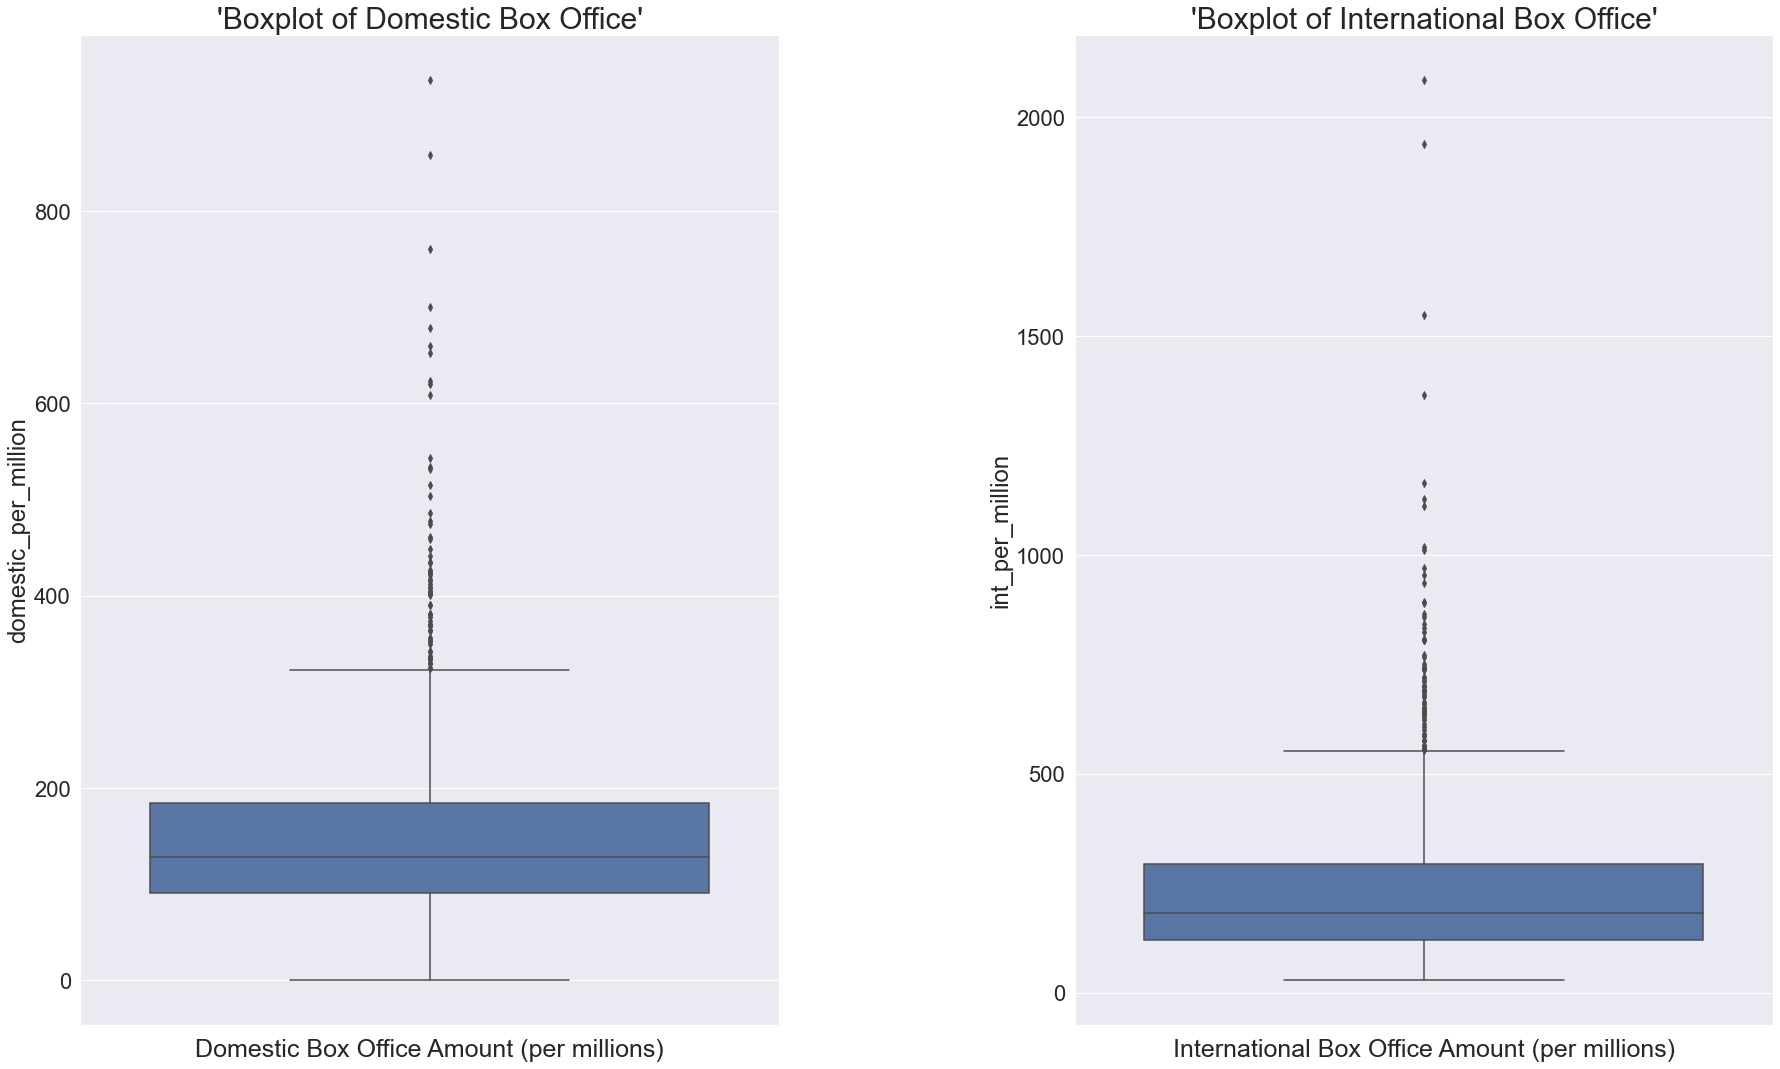

In [10]:
#Box plots of domestic and international box office, checking for outliers


fig, axs = plt.subplots(1, 2)
fig.set_figwidth(25)
fig.set_figheight(15)
fig.tight_layout(h_pad = 10, w_pad=10)

sns.boxplot(ax=axs[0],data=indep_var, y='domestic_per_million')
axs[0].set_title("'Boxplot of Domestic Box Office'", fontdict={"fontsize": 30})
axs[0].set_xlabel("Domestic Box Office Amount (per millions)", fontdict={"fontsize": 25})

sns.boxplot(ax=axs[1],data=indep_var, y='int_per_million')
axs[1].set_title("'Boxplot of International Box Office'", fontdict={"fontsize": 30})
axs[1].set_xlabel("International Box Office Amount (per millions)", fontdict={"fontsize": 25})

plt.show()

In [11]:
#outliers are more prominent for domestic box office values higher than 500
#we can remove the outliers



#creating one data set for outlier removal of domestic box office and another for the international

#df4 is data with domestic outliers removed
df4=df3[df3['domestic_per_million']<=300]
df4.shape



(892, 23)

In [12]:
#df5 is data with international outliers removed
df5=df3[df3['int_per_million']<=450]
df5.shape

(874, 23)

In [13]:
df4.head()

,Unnamed: 0,rank,year,wwbox_office,dombox_office,internationalbox_office,url,genre,production_companies,inflation_rank,...,main,number_of_stars,director_main,number_of_directors,production_companies_main,number_of_production_companies,ww_per_million,domestic_per_million,int_per_million,infl_gross_per_million
movie,,,,,,,,,,,,,,,,,,,,,
The Fate of the Furious,18,19,2017,1.236704e+09,225764765.0,1.010939e+09,/movie/Fate-of-the-Furious-The,Action,"['Universal-Pictures', 'Original-Film', 'One-R...",371.0,...,Vin Diesel,3,F. Gary Gray,1,Universal-Pictures,3,1236.70,225.76,1010.94,230.55
Transformers: Age of Extinction,28,29,2014,1.104054e+09,245439076.0,8.586150e+08,/movie/Transformers-Age-of-Extinction,Action,"['di-Bonaventura-Pictures', 'Tom-DeSanto', 'Do...",267.0,...,Mark Wahlberg,3,Michael Bay,1,di-Bonaventura-Pictures,3,1104.05,245.44,858.61,275.18
Pirates of the Caribbean: On Stranger…,37,38,2011,1.045714e+09,241071802.0,8.046420e+08,/movie/Pirates-of-the-Caribbean-On-Stranger-Tides,Adventure,['Walt-Disney-Pictures'],257.0,...,Johnny Depp,3,Rob Marshall,1,Walt-Disney-Pictures,1,1045.71,241.07,804.64,278.46
Despicable Me 3,39,40,2017,1.032597e+09,264624300.0,7.679726e+08,/movie/Despicable-Me-3,Adventure,"['Universal-Pictures', 'Illumination-Entertain...",281.0,...,Steve Carell,3,Pierre Coffin,2,Universal-Pictures,2,1032.60,264.62,767.97,270.23
The Hobbit: The Desolation of Smaug,51,52,2013,9.593584e+08,258241522.0,7.011169e+08,/movie/Hobbit-The-Desolation-of-Smaug-The,Adventure,['Wingnut-Films'],236.0,...,Martin Freeman,1,Peter Jackson,1,Wingnut-Films,1,959.36,258.24,701.12,290.80


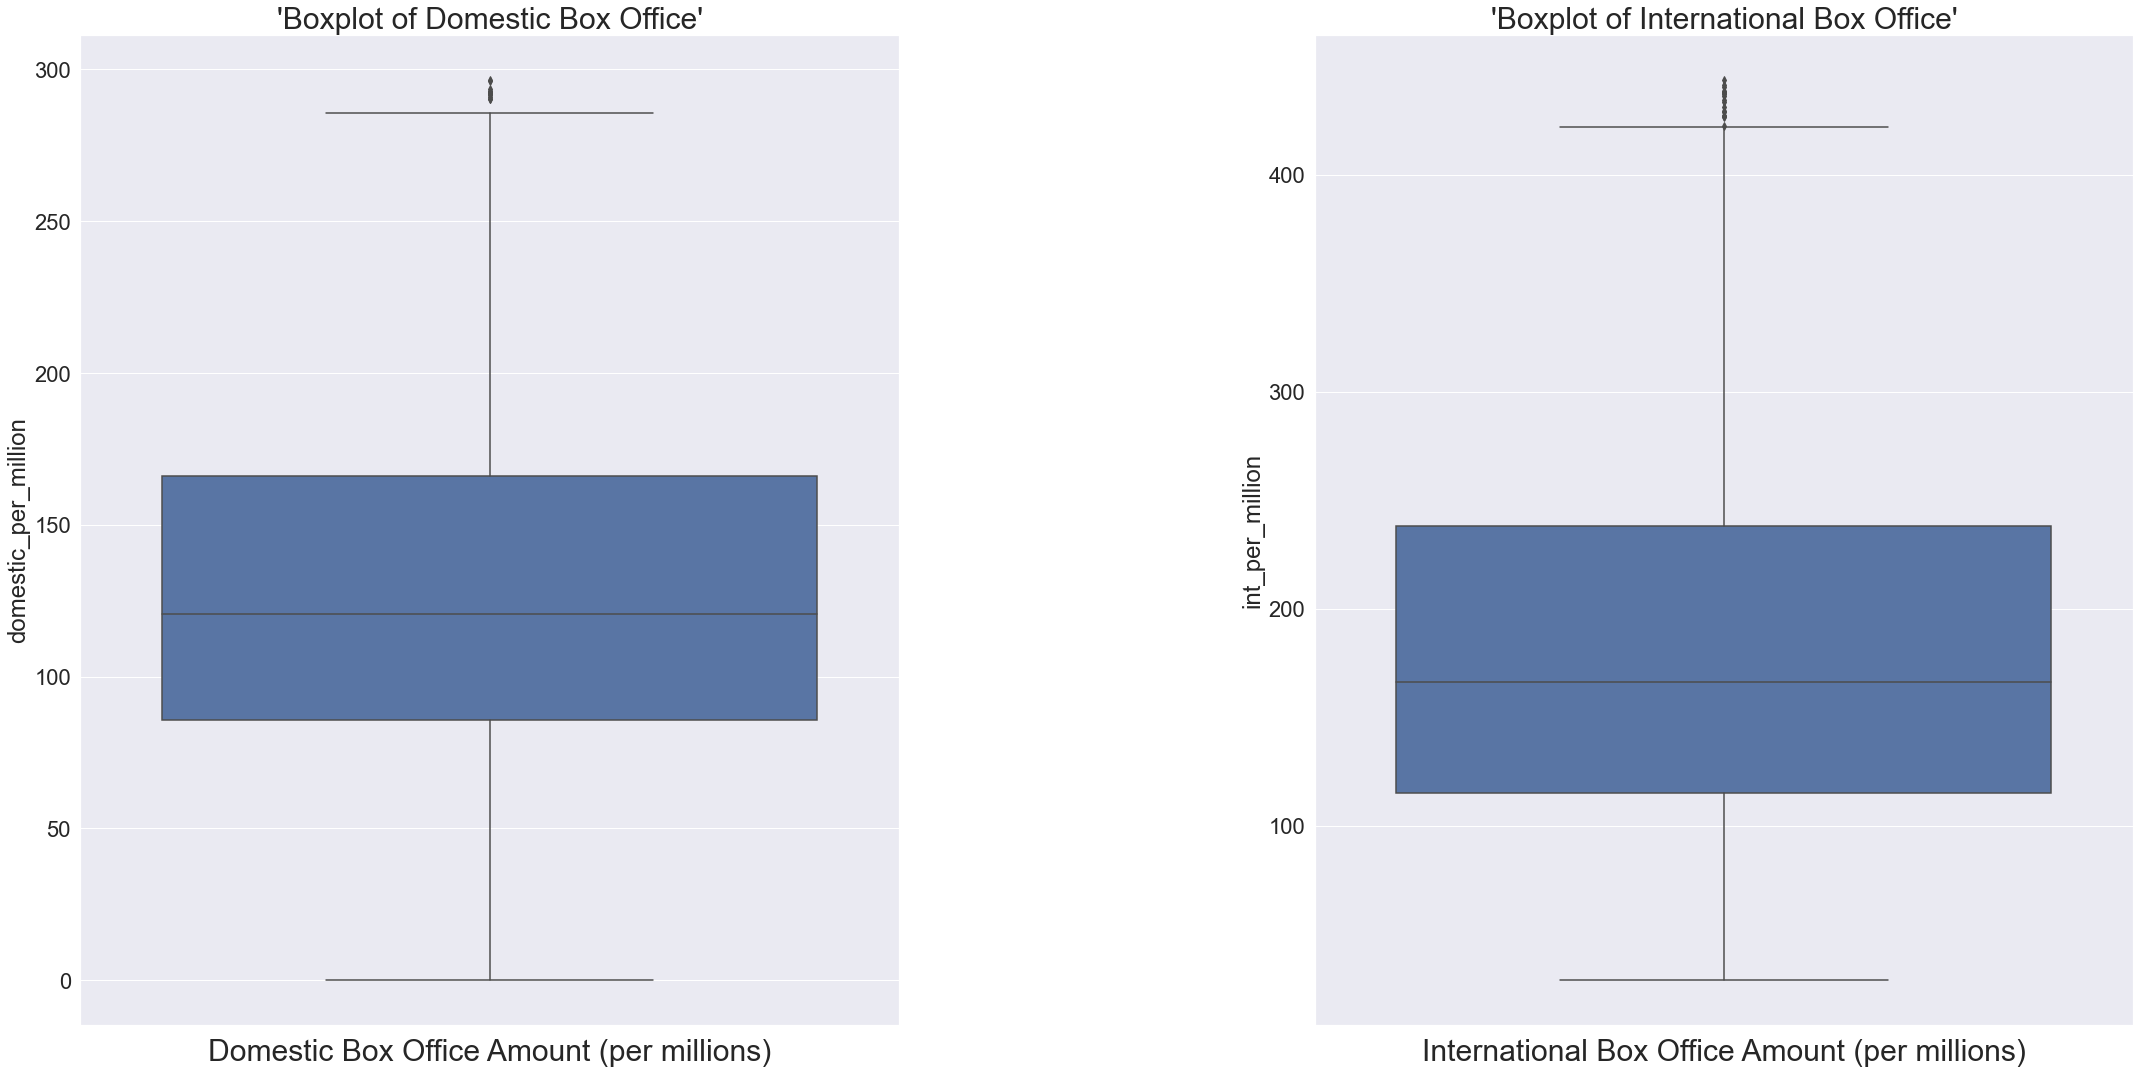

In [14]:
#box plots with outliers removed
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.tight_layout(h_pad = 10, w_pad=15)

sns.boxplot(ax=axs[0],data=df4, y='domestic_per_million')
axs[0].set_title("'Boxplot of Domestic Box Office'", fontdict={"fontsize": 30})
axs[0].set_xlabel("Domestic Box Office Amount (per millions)", fontdict={"fontsize": 30})

sns.boxplot(ax=axs[1],data=df5, y='int_per_million')
axs[1].set_title("'Boxplot of International Box Office'", fontdict={"fontsize": 30})
axs[1].set_xlabel("International Box Office Amount (per millions)", fontdict={"fontsize": 30})


plt.show()

Text(1138.9659090909088, 0.5, 'Worldwide Box Office')

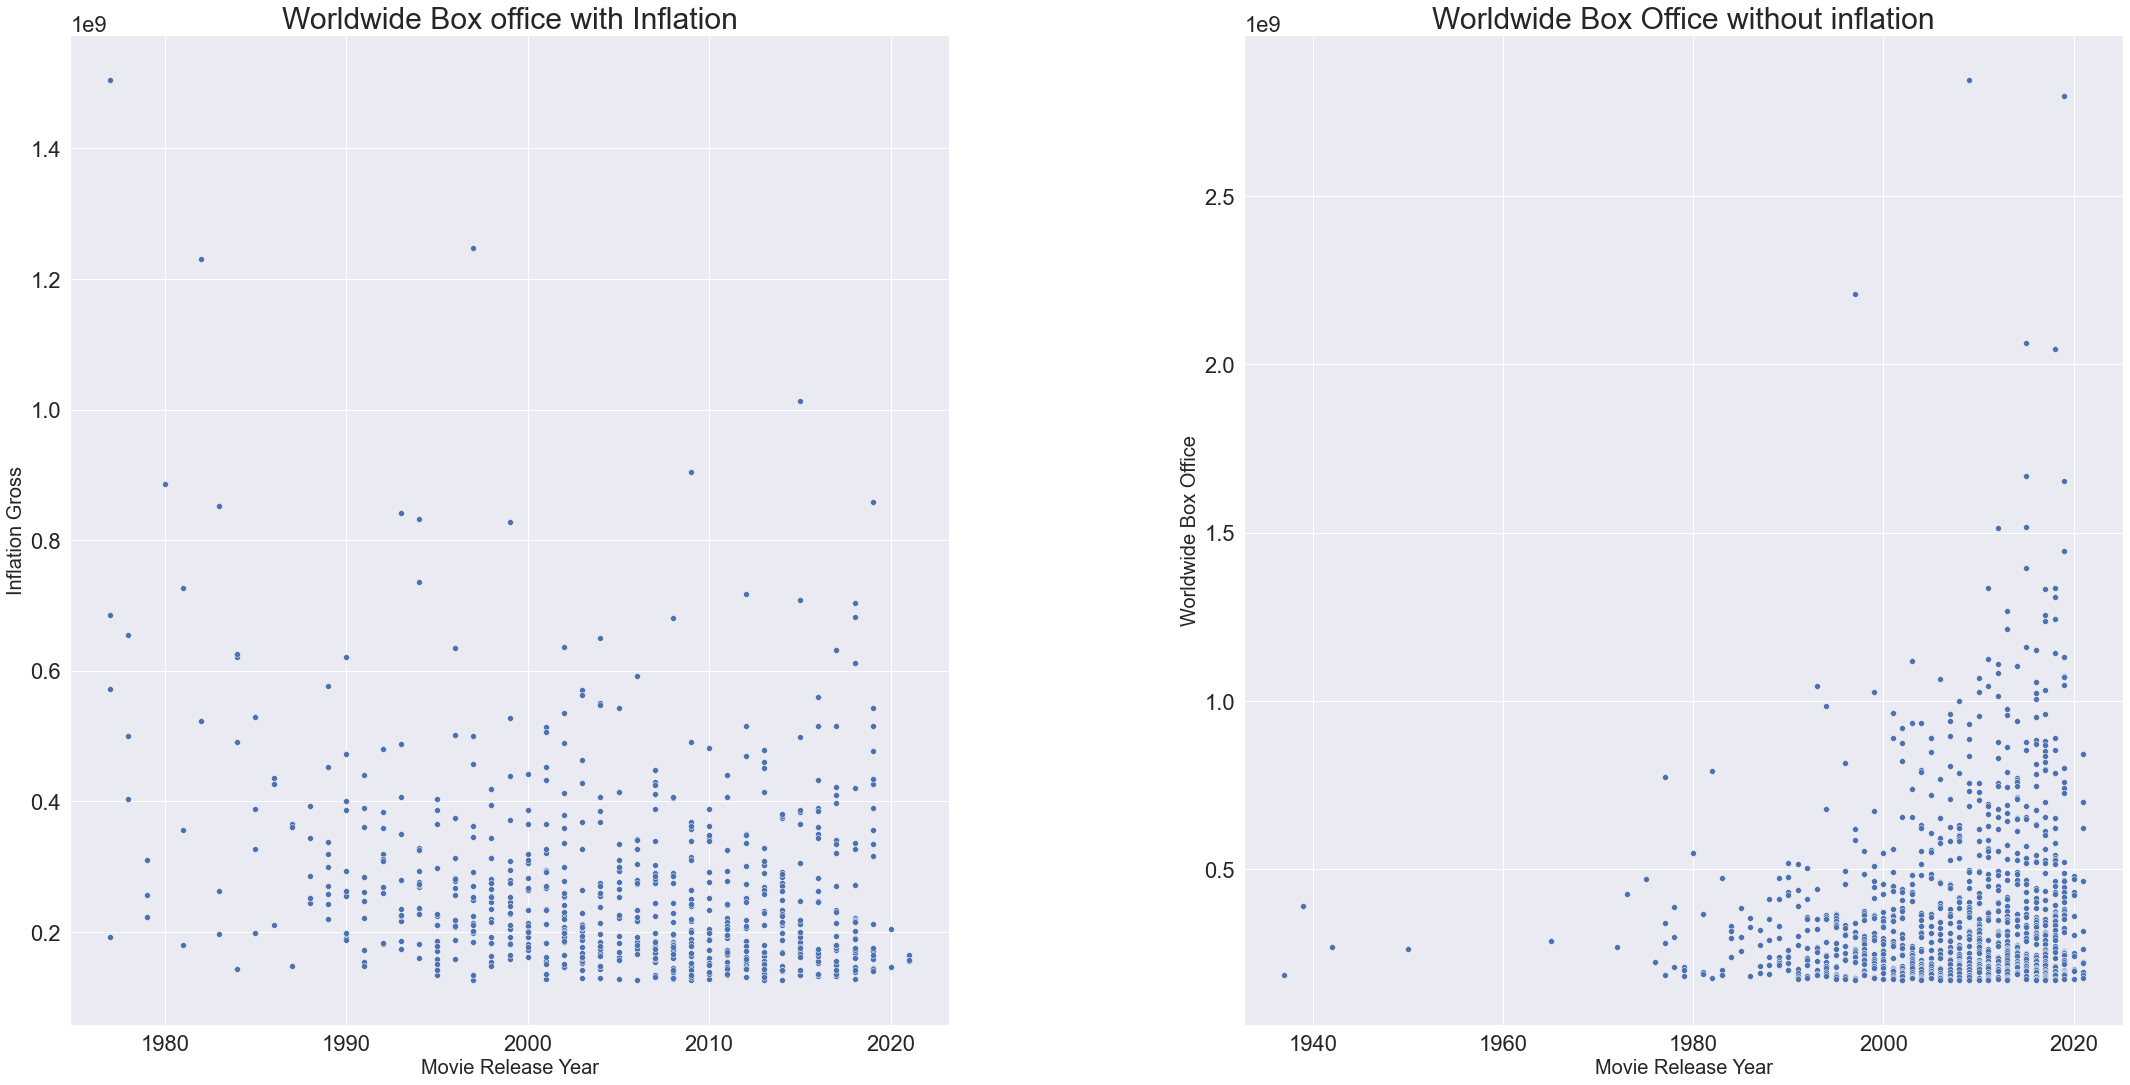

In [15]:
#scatter plots of Worldwide box office and gross box due to inflation
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.tight_layout(h_pad = 10, w_pad=10)

sns.scatterplot(ax=axs[0],data=df_2, y='infl_gross_box_office', x='year')
axs[0].set_title("Worldwide Box office with Inflation", fontdict={"fontsize": 30})
axs[0].set_ylabel("Inflation Gross", fontdict={"fontsize": 20})
axs[0].set_xlabel("Movie Release Year", fontdict={"fontsize": 20})

sns.scatterplot(ax=axs[1],data=df_2, y='wwbox_office', x='year')
axs[1].set_title("Worldwide Box Office without inflation", fontdict={"fontsize": 30})
axs[1].set_xlabel("Movie Release Year", fontdict={"fontsize": 20})
axs[1].set_ylabel("Worldwide Box Office", fontdict={"fontsize": 20})


Text(0.5, 1.0, "'Movies Distribution Across the Years'")

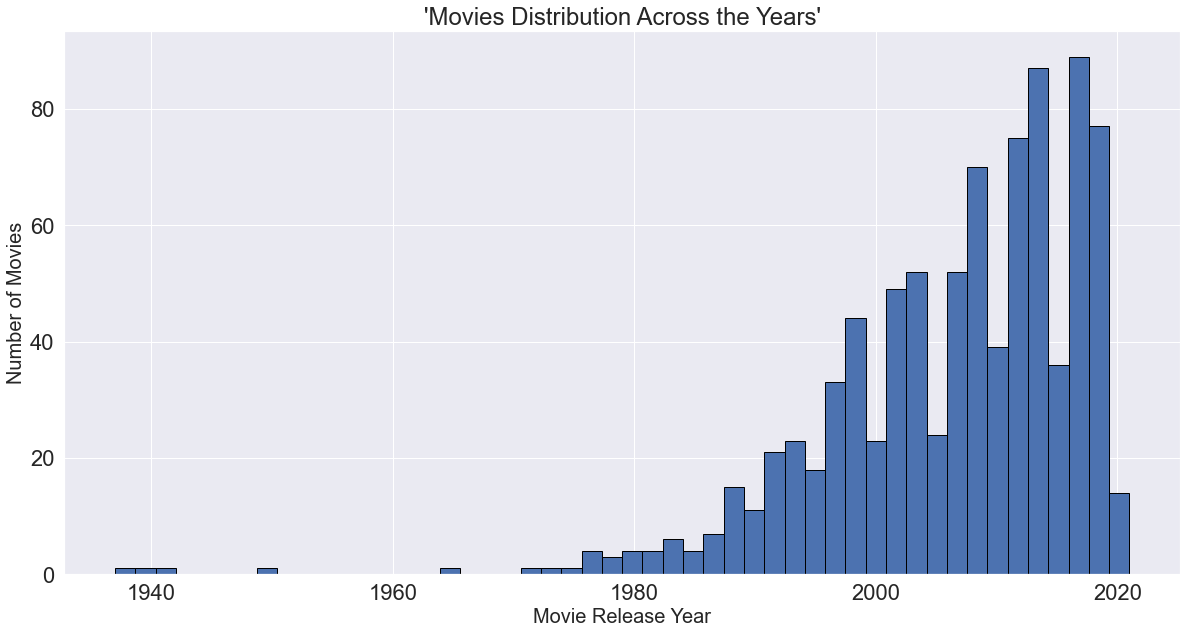

In [16]:
#plotting number of movies across the years

plt.figure(figsize=(20,10))



fig4 = plt.hist(df4.year, bins = 50,edgecolor='black')
plt.xlabel("Movie Release Year", size =20)
plt.ylabel("Number of Movies", size=20)
plt.title("'Movies Distribution Across the Years'")

<AxesSubplot:ylabel='infl_gross_per_million'>

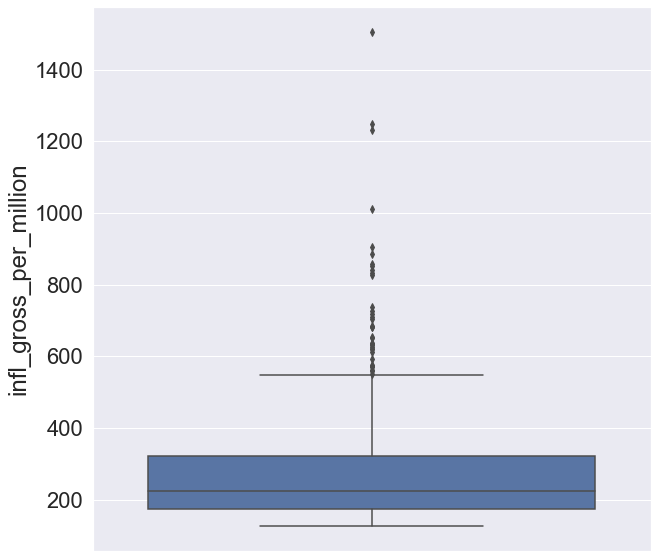

In [17]:
#I can ignore this cell. 
plt.figure(figsize = (10,10))
sns.boxplot(data=df_2, y='infl_gross_per_million')


<AxesSubplot:ylabel='infl_gross_per_million'>

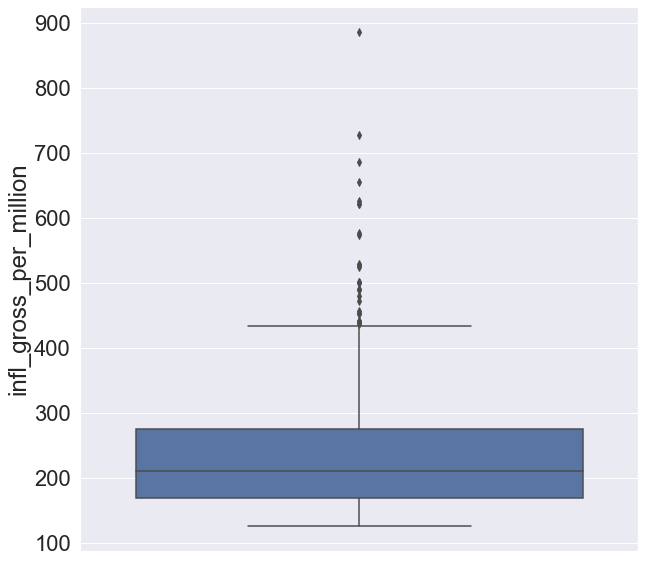

In [18]:
#I can ignore this cell. 
plt.figure(figsize = (10,10))
sns.boxplot(data=df4, y='infl_gross_per_million')


<AxesSubplot:ylabel='infl_gross_per_million'>

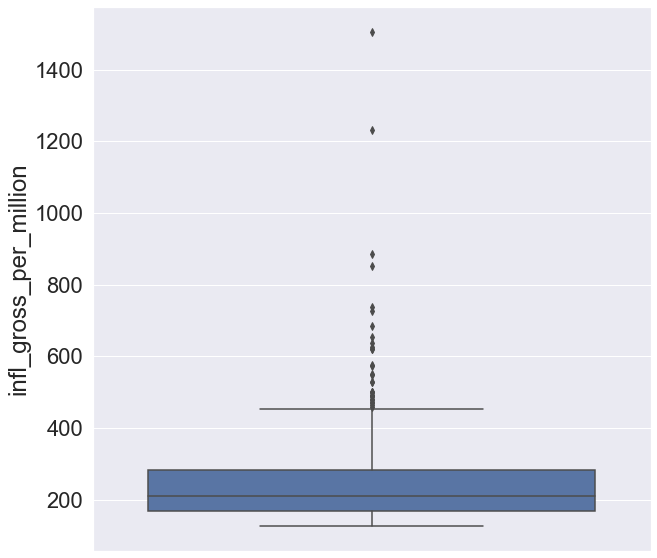

In [19]:
plt.figure(figsize = (10,10))
sns.boxplot(data=df5, y='infl_gross_per_million')

In [20]:
df3.head()
df3.corr()

,Unnamed: 0,year,wwbox_office,dombox_office,internationalbox_office,inflation_rank,infl_gross_box_office,number_of_stars,number_of_directors,number_of_production_companies,ww_per_million,domestic_per_million,int_per_million,infl_gross_per_million
Unnamed: 0,1.000000,-0.166917,-0.786573,-0.678729,-0.753833,0.544162,-0.496007,-0.345682,-0.347781,-0.026111,-0.786573,-0.678728,-0.753833,-0.496007
year,-0.166917,1.000000,0.191810,0.038262,0.264607,0.265594,-0.245346,0.346738,0.301925,0.357332,0.191810,0.038261,0.264608,-0.245346
wwbox_office,-0.786573,0.191810,1.000000,0.864209,0.959677,-0.525001,0.632935,0.305612,0.299390,-0.016395,1.000000,0.864208,0.959677,0.632935
dombox_office,-0.678729,0.038262,0.864209,1.000000,0.699497,-0.648563,0.783167,0.274355,0.224233,-0.091478,0.864209,1.000000,0.699496,0.783166
internationalbox_office,-0.753833,0.264607,0.959677,0.699497,1.000000,-0.432194,0.520644,0.271642,0.288269,0.011780,0.959677,0.699496,1.000000,0.520644
inflation_rank,0.544162,0.265594,-0.525001,-0.648563,-0.432194,1.000000,-0.780339,-0.127387,-0.154890,0.213818,-0.525001,-0.648563,-0.432195,-0.780339
infl_gross_box_office,-0.496007,-0.245346,0.632935,0.783167,0.520644,-0.780339,1.000000,0.179834,0.191713,-0.174171,0.632935,0.783167,0.520643,1.000000
number_of_stars,-0.345682,0.346738,0.305612,0.274355,0.271642,-0.127387,0.179834,1.000000,0.658939,0.232251,0.305612,0.274356,0.271642,0.179835
number_of_directors,-0.347781,0.301925,0.299390,0.224233,0.288269,-0.154890,0.191713,0.658939,1.000000,0.186274,0.299390,0.224232,0.288269,0.191714
number_of_production_companies,-0.026111,0.357332,-0.016395,-0.091478,0.011780,0.213818,-0.174171,0.232251,0.186274,1.000000,-0.016395,-0.091478,0.011780,-0.174170


### Data exploration for Genre and Domestic/Int Box Office 

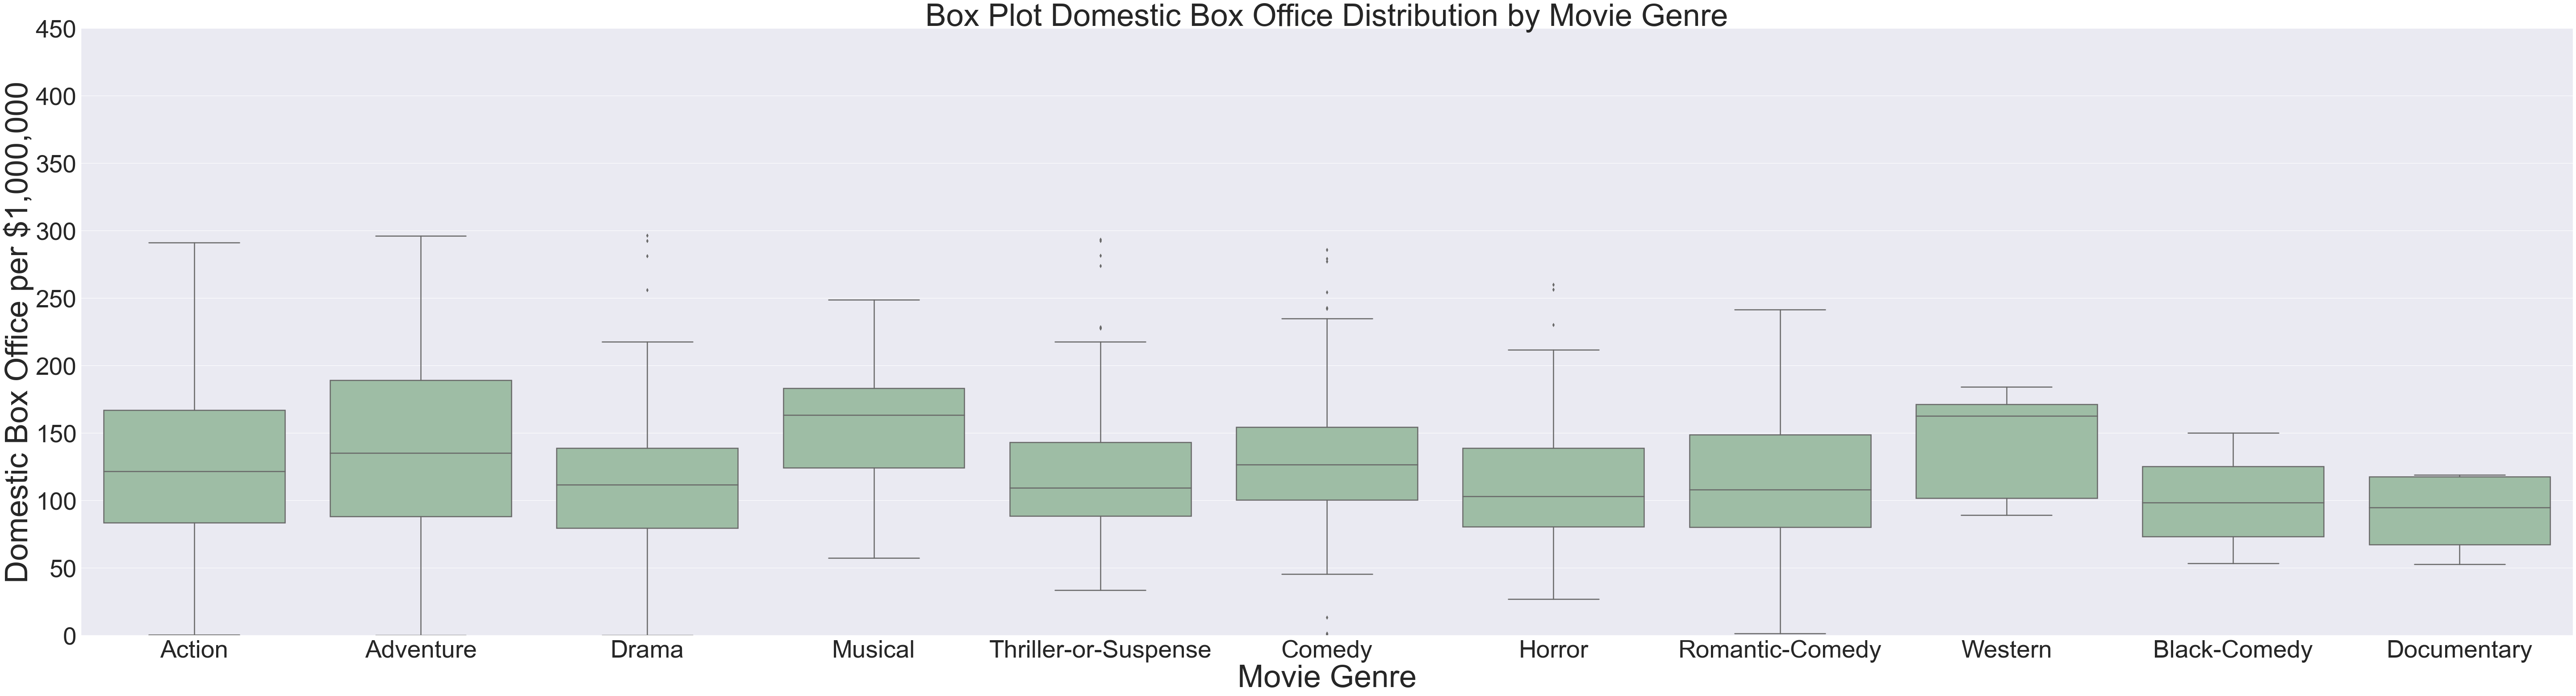

In [21]:
#boxplot to show the distribution of Domestic box office by Genre
plt.figure(figsize=(100,25))
sns.set(font_scale = 5)
plt.ylim(0,450)
ax = sns.boxplot(x='genre', y='domestic_per_million', data=df4, color='#99c2a2', linewidth=2.5)
plt.xlabel("Movie Genre", size=70)
plt.ylabel("Domestic Box Office per $1,000,000", size=70)
plt.title("Box Plot Domestic Box Office Distribution by Movie Genre", size=70)
plt.show()

#box plot shows that the data does contain some outliers, mainly for genre types Drama, Adventure, Action and Thriller or Suspense




### Data exploration for International Box Office

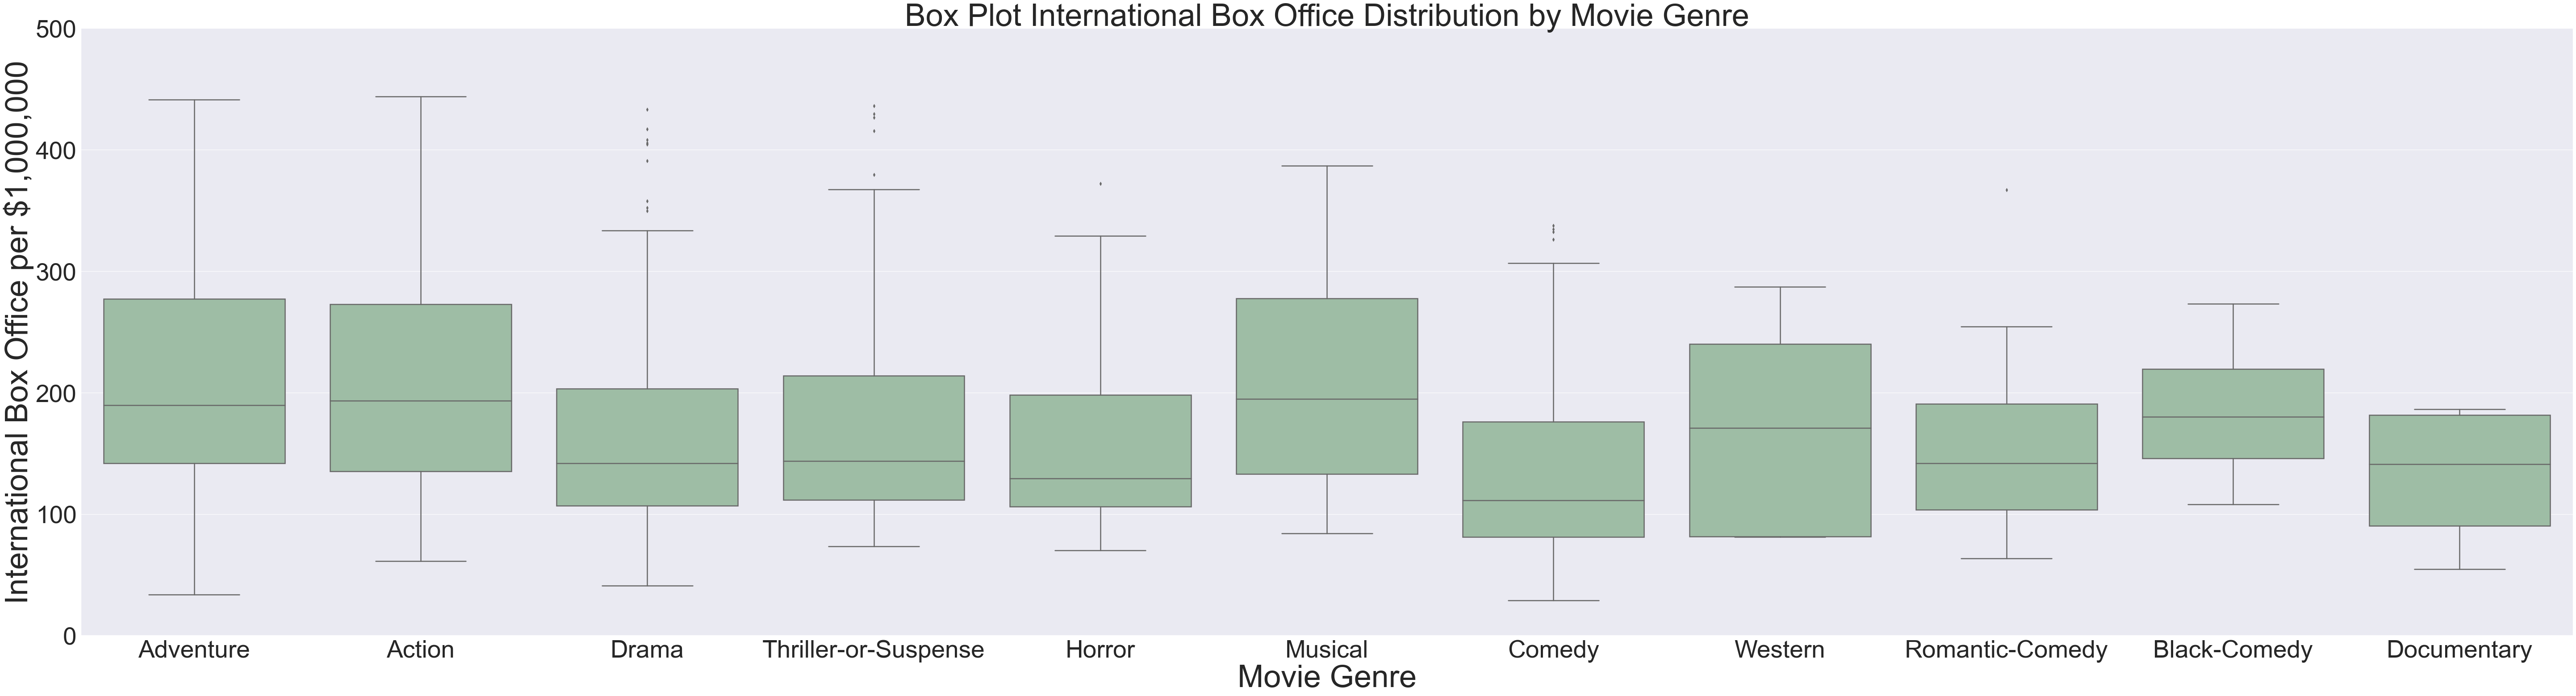

In [22]:
#boxplot to show the distribution of International box office by Genre
plt.figure(figsize=(100,25))
sns.set(font_scale = 5)
plt.ylim(0,500)
ax = sns.boxplot(x='genre', y='int_per_million', data=df5, color='#99c2a2', linewidth=2.5)
plt.xlabel("Movie Genre", size=70)
plt.ylabel("International Box Office per $1,000,000", size=70)
plt.title("Box Plot International Box Office Distribution by Movie Genre", size=70)
plt.show()

In [23]:
#domestic box office summary stats of all movie genre types
#looking at the domestic box office, seams like the highest average is comimg from musical and adventure movies
by_genre = df4.groupby('genre')
print("Summary Stats of Domestic Box Office (per millions) for each Movie Genre Type")
by_genre['domestic_per_million'].describe().sort_values(by='mean', ascending=False)



Summary Stats of Domestic Box Office (per millions) for each Movie Genre Type


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Musical,19.0,155.673684,47.813171,57.39,124.3150,163.210,183.3700,248.76
Western,5.0,141.838000,43.233706,89.30,101.6300,162.810,171.2400,184.21
Adventure,266.0,141.405150,68.708380,0.02,88.2375,135.330,189.2025,296.13
Comedy,116.0,128.796552,55.448234,0.67,100.4875,126.550,154.5075,285.76
Action,218.0,125.418073,61.386866,0.36,83.6375,121.630,167.0475,291.05
Thriller-or-Suspense,72.0,124.444028,57.616543,33.70,88.4000,109.440,143.1250,293.51
Horror,40.0,117.244500,54.790879,26.84,80.4550,102.985,138.7400,260.00
Drama,110.0,115.548182,58.402147,0.01,79.4675,111.550,138.7075,296.62
Romantic-Comedy,38.0,108.444737,53.544889,1.29,80.3000,108.150,148.6900,241.44


In [24]:
#international box office summary stats of all movie genre types
#looking at the domestic box office, seams like the highest average is comimg from musical and adventure movies
by_genre = df5.groupby('genre')
print("Summary Stats of International Box Office (per millions) for each Movie Genre Type")
by_genre['int_per_million'].describe().sort_values(by='mean', ascending=False)

Summary Stats of International Box Office (per millions) for each Movie Genre Type


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,209.0,214.097608,96.616591,61.10,135.0000,193.140,272.8000,443.71
Adventure,249.0,213.950120,96.068295,33.60,141.7700,189.540,277.2900,441.37
Musical,16.0,213.520000,95.681240,83.95,132.8100,194.750,277.5725,386.85
Black-Comedy,4.0,185.132500,69.938833,107.76,145.8000,179.900,219.2325,272.97
Thriller-or-Suspense,75.0,175.889200,91.671724,73.37,111.5200,143.440,213.8350,436.01
Western,5.0,172.030000,92.665275,81.03,81.3800,170.700,240.0000,287.04
Drama,113.0,167.884956,88.233771,40.99,106.7900,141.600,203.3000,433.24
Horror,41.0,153.738293,70.964816,70.00,105.9800,129.400,197.8700,372.25
Romantic-Comedy,39.0,151.910256,63.418980,63.57,103.4550,141.910,190.7450,366.96


In [25]:
df4.head()
df_count=df4[["year", "domestic_per_million", "number_of_production_companies", "number_of_stars", "number_of_directors"]]
df_count.head()
df_count.shape

(892, 5)

In [26]:
by_studio = df4.groupby('production_companies_main')
print("Summary Stats of Domestic Box Office (per millions) for each Movie Studio")
by_studio['domestic_per_million'].describe().sort_values(by='mean', ascending=False)

Summary Stats of Domestic Box Office (per millions) for each Movie Studio


,count,mean,std,min,25%,50%,75%,max
production_companies_main,,,,,,,,
Vertigo-Entertainment,1.0,257.78,NaN,257.78,257.78,257.78,257.780,257.78
Temple-Hill-Entertainment,3.0,255.46,54.570526,192.77,237.03,281.29,286.805,292.32
Guber-Peters,1.0,251.19,NaN,251.19,251.19,251.19,251.190,251.19
Spyglass-Entertainment,1.0,242.70,NaN,242.70,242.70,242.70,242.700,242.70
Bad-Hat-Harry-Productions,1.0,233.92,NaN,233.92,233.92,233.92,233.920,233.92
...,...,...,...,...,...,...,...,...
Far-East-Films,1.0,0.29,NaN,0.29,0.29,0.29,0.290,0.29
Bona-Film-Group,1.0,0.22,NaN,0.22,0.22,0.22,0.220,0.22
Edko-Films,1.0,0.03,NaN,0.03,0.03,0.03,0.030,0.03


In [27]:
by_director = df4.groupby('director_main')
print("Summary Stats of Domestic Box Office (per millions) by Director")
by_director['domestic_per_million'].describe().sort_values(by='mean', ascending=False)

Summary Stats of Domestic Box Office (per millions) by Director


,count,mean,std,min,25%,50%,75%,max
director_main,,,,,,,,
Chris Weitz,1.0,296.620,NaN,296.62,296.6200,296.620,296.6200,296.62
Irvin Kershner,1.0,291.740,NaN,291.74,291.7400,291.740,291.7400,291.74
Pete Docter,2.0,291.575,2.015254,290.15,290.8625,291.575,292.2875,293.00
Bill Condon,2.0,286.805,7.799388,281.29,284.0475,286.805,289.5625,292.32
Andrew Adamson,2.0,279.685,17.005918,267.66,273.6725,279.685,285.6975,291.71
...,...,...,...,...,...,...,...,...
Raman Hui,2.0,0.370,0.480833,0.03,0.2000,0.370,0.5400,0.71
Stanley Tong,1.0,0.360,NaN,0.36,0.3600,0.360,0.3600,0.36
Tony Chan,1.0,0.290,NaN,0.29,0.2900,0.290,0.2900,0.29


In [28]:
by_star = df4.groupby('main')
print("Summary Stats of Domestic Box Office (per millions) by Movie Star")
by_star['main'].describe()

Summary Stats of Domestic Box Office (per millions) by Movie Star


,count,unique,top,freq
main,,,,
Aamir Khan,1,1,Aamir Khan,1
Aaron Eckhart,1,1,Aaron Eckhart,1
Aaron Kwok,1,1,Aaron Kwok,1
Aaron Paul,1,1,Aaron Paul,1
Aaron Taylor-Johnson,1,1,Aaron Taylor-Johnson,1
...,...,...,...,...
Wu Jing,1,1,Wu Jing,1
Xu Zheng,3,1,Xu Zheng,3
Yanting LÃ¼,1,1,Yanting LÃ¼,1


In [29]:
df_count=df3[["number_of_production_companies", "number_of_stars", "number_of_directors"]]
df_count.head()
df_count.describe()

,number_of_production_companies,number_of_stars,number_of_directors
count,1000.000000,1000.000000,1000.000000
mean,2.592000,1.576000,0.825000
std,1.641411,1.213135,0.551978
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,2.000000,2.000000,1.000000
75%,3.000000,3.000000,1.000000
max,20.000000,3.000000,3.000000


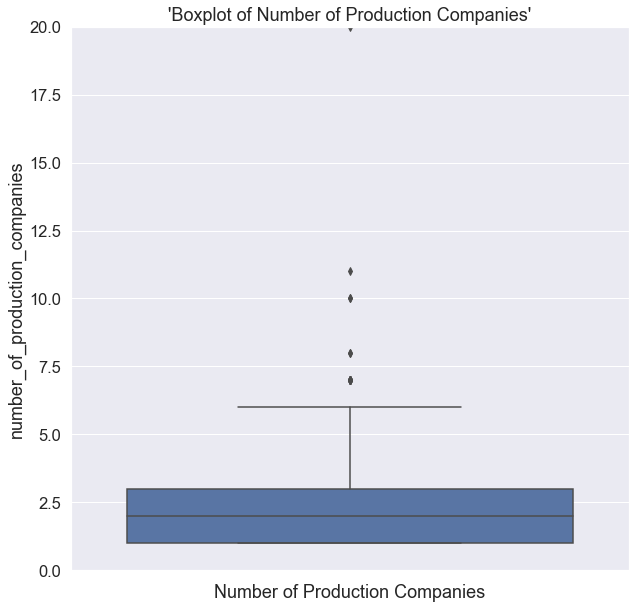

In [30]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.ylim(0,20)
plt.xlabel("Number of Production Companies")
plt.title("'Boxplot of Number of Production Companies'")

sns.boxplot(y=df3['number_of_production_companies'])
plt.show()

In [31]:
df_count.corr()
#correlation matrix shows that number of stars in a movie is strongly related to number of directors

,number_of_production_companies,number_of_stars,number_of_directors
number_of_production_companies,1.000000,0.232251,0.186274
number_of_stars,0.232251,1.000000,0.658939
number_of_directors,0.186274,0.658939,1.000000


### ANOVA FOR MOVIE GENRE on DOMESTIC BOX OFFICE ###

In [32]:
# get ANOVA table
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df3, res_var='domestic_per_million', anova_model='domestic_per_million ~ C(genre)')
res.anova_summary


,df,sum_sq,mean_sq,F,PR(>F)
C(genre),10.0,5.772659e+05,57726.589367,5.157697,2.197649e-07
Residual,970.0,1.085655e+07,11192.318890,NaN,NaN


In [33]:
#tukey test for pairwise comparisons--post hoc
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df3, res_var='domestic_per_million', xfac_var='genre', anova_model='domestic_per_million ~ C(genre)')
res.tukey_summary


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Action,Drama,46.454020,-14.506511,107.414550,3.425420,0.314997
1,Action,Adventure,3.482702,-38.348070,45.313474,0.374248,0.900000
2,Action,Musical,24.369040,-74.461358,123.199438,1.108376,0.900000
3,Action,Thriller-or-Suspense,64.255540,-1.447298,129.958378,4.396081,0.061510
4,Action,Horror,77.811915,-18.221356,173.845186,3.642199,0.232325
5,Action,Comedy,70.063976,8.178683,131.949269,5.089165,0.012898
6,Action,Western,62.351707,-148.956572,273.659985,1.326389,0.900000
7,Action,Black-Comedy,101.580040,-156.205776,359.365856,1.771286,0.900000
8,Action,Romantic-Comedy,89.003502,-16.396355,194.403359,3.795826,0.182832
9,Drama,Adventure,49.936722,-8.140600,108.014043,3.865028,0.163699


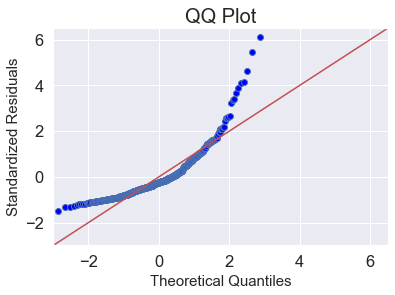

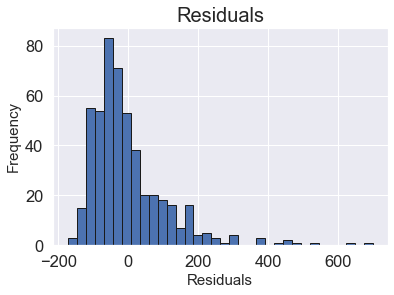

In [34]:
# QQ-plot

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)

sm.qqplot(res.anova_std_residuals, line='45')
plt.title("QQ Plot", fontsize=20)
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Standardized Residuals", fontsize=15)
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.title("Residuals", fontsize=20)
plt.xlabel("Residuals", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()


In [35]:
#since data is not normally distributed, we will use Levene's test to check for homogenity of variances
#significant p-value means that the variances are not constant and some transformation is needed
res = stat()
res.levene(df=df3, res_var='domestic_per_million', xfac_var='genre')
res.levene_summary

,Parameter,Value
0,Test statistics (W),2.7038
1,Degrees of freedom (Df),9.0000
2,p value,0.0044


In [36]:
#since residuals are not normal, and there is not homeogneity of variances, its worht transforming our variables. 
#one transofrmation we can do is taking the square root of our dependent variable Domestic box office
df3=df3.assign(dom_sq_rt = df3.domestic_per_million**0.5)
df4=df4.assign(dom_sq_rt = df4.domestic_per_million**0.5) #df4 is the df with domestic per million outliers removed
df5=df5.assign(int_sq_rt = df5.int_per_million**0.5)#df5 is the df with int per million outliers removed

### Repeating ANOVA on transformed Domesitic box office variable (outliers removed)

In [37]:

# get ANOVA table 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df4, res_var='dom_sq_rt', anova_model='dom_sq_rt ~ C(genre)')
print("Anova for Domestic Box Office")
res.anova_summary


Anova for Domestic Box Office


,df,sum_sq,mean_sq,F,PR(>F)
C(genre),10.0,216.773007,21.677301,2.264387,0.01293
Residual,881.0,8433.940460,9.573145,NaN,NaN


In [38]:
#tukey test for pairwise comparisons
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df4, res_var='dom_sq_rt', xfac_var='genre', anova_model='dom_sq_rt ~ C(genre)')
res.tukey_summary[res.tukey_summary['p-value']<0.05]



,group1,group2,Diff,Lower,Upper,q-value,p-value
9,Adventure,Drama,1.109012,0.041539,2.176485,4.674768,0.034408
11,Adventure,Thriller-or-Suspense,1.225970,0.094113,2.357827,4.873815,0.021925


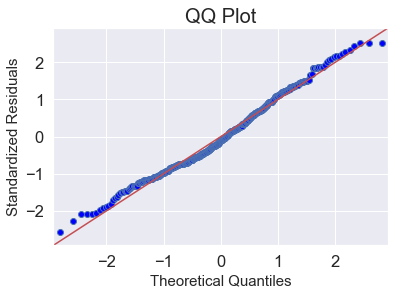

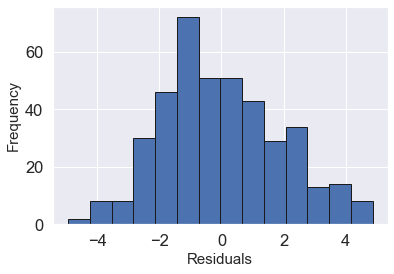

,Parameter,Value
0,Test statistics (W),1.1921
1,Degrees of freedom (Df),9.0000
2,p value,0.2983


In [39]:
# QQ-plot

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)

sm.qqplot(res.anova_std_residuals, line='45')
plt.title("QQ Plot", fontsize=20)
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Standardized Residuals", fontsize=15)
plt.show()

# histogram

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals", fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

#tranformation definitely helped normalize the residuals

res = stat()
res.levene(df=df4, res_var='dom_sq_rt', xfac_var='genre')
res.levene_summary

### ANOVA on International Box Office variable

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df3, res_var='int_per_million', anova_model='int_per_million ~ C(genre)')
print("Anova for International Box Office")
res.anova_summary

Anova for International Box Office


,df,sum_sq,mean_sq,F,PR(>F)
C(genre),10.0,4.567322e+06,456732.197209,12.406081,1.760288e-20
Residual,987.0,3.633659e+07,36815.185992,NaN,NaN


In [41]:
#tukey test for pairwise comparisons
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df3, res_var='int_per_million', xfac_var='genre', anova_model='int_per_million ~ C(genre)')
res.tukey_summary[res.tukey_summary['p-value']<0.05]



,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Action,Drama,170.544620,47.495713,293.593528,6.230164,0.001000
3,Action,Thriller-or-Suspense,184.429100,51.807839,317.050361,6.251087,0.001000
4,Action,Horror,251.619850,57.776574,445.463126,5.834900,0.001764
5,Action,Comedy,286.901472,161.985932,411.817013,10.324179,0.001000
8,Action,Romantic-Comedy,271.491292,58.741549,484.241035,5.736224,0.002335
9,Drama,Adventure,128.013494,10.784347,245.242640,4.908620,0.019926
18,Adventure,Thriller-or-Suspense,141.897973,14.657893,269.138054,5.012928,0.015539
19,Adventure,Horror,209.088723,18.886581,399.290866,4.941450,0.018442
20,Adventure,Comedy,244.370345,125.183385,363.557305,9.216351,0.001000
23,Adventure,Romantic-Comedy,228.960165,19.522604,438.397727,4.914107,0.019673


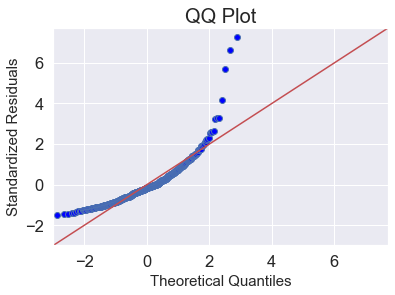

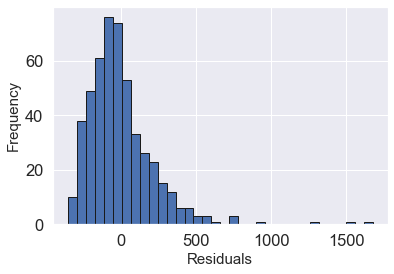

,Parameter,Value
0,Test statistics (W),4.959
1,Degrees of freedom (Df),9.000
2,p value,0.000


In [42]:
# QQ-plot

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.title("QQ Plot", fontsize=20)
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Standardized Residuals", fontsize=15)
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

#tranformation definitely helped normalize the residuals

res = stat()
res.levene(df=df3, res_var='int_per_million', xfac_var='genre')
res.levene_summary

### Repeating ANOVA on transformed International box office variable (outliers removed)

In [43]:

# get ANOVA 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df5, res_var='int_sq_rt', anova_model='int_sq_rt ~ C(genre)')
print("Anova for International Box Office")
res.anova_summary

Anova for International Box Office


,df,sum_sq,mean_sq,F,PR(>F)
C(genre),10.0,1233.379227,123.337923,12.446515,2.252398e-20
Residual,863.0,8551.841815,9.909434,NaN,NaN


In [44]:
#tukey test for pairwise comparisons
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df5, res_var='int_sq_rt', xfac_var='genre', anova_model='int_sq_rt ~ C(genre)')
res.tukey_summary[res.tukey_summary['p-value']<0.05]



,group1,group2,Diff,Lower,Upper,q-value,p-value
1,Adventure,Drama,2.086899,0.185733,3.988064,4.940903,0.018838
3,Adventure,Horror,3.078623,0.173181,5.984065,4.769458,0.027953
5,Adventure,Comedy,4.627777,2.756654,6.498899,11.132560,0.001000
8,Adventure,Romantic-Comedy,3.714875,0.525807,6.903943,5.243306,0.008999
9,Action,Drama,2.428910,0.414752,4.443068,5.428036,0.005591
11,Action,Horror,3.420634,0.440031,6.401237,5.165677,0.010931
13,Action,Comedy,4.969788,2.983963,6.955613,11.264754,0.001000
16,Action,Romantic-Comedy,4.056886,0.799194,7.314578,5.605413,0.003480
20,Drama,Comedy,2.540878,0.257636,4.824120,5.009064,0.016024
26,Thriller-or-Suspense,Comedy,3.083850,0.695588,5.472112,5.812139,0.001963


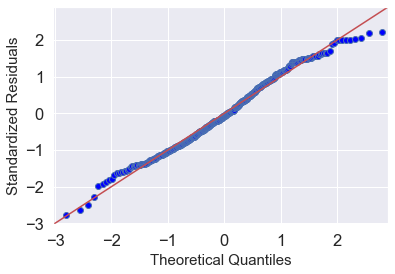

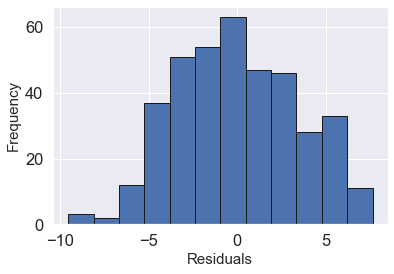

,Parameter,Value
0,Test statistics (W),1.0600
1,Degrees of freedom (Df),9.0000
2,p value,0.3917


In [45]:
# QQ-plot

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Standardized Residuals", fontsize=15)
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

#tranformation definitely helped normalize the residuals

res = stat()
res.levene(df=df5, res_var='int_sq_rt', xfac_var='genre')
res.levene_summary

### Linear Regression on Domestic Box Office vs movie release year, number of production companies, main actors, directors

In [46]:
#importing libraries for regression
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [47]:


model=smf.ols(formula = "dom_sq_rt ~ year + number_of_production_companies + number_of_stars + number_of_directors + infl_gross_per_million", 
                 data=df4, missing='drop').fit()
predictions=model.predict()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              dom_sq_rt   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1175.
Date:                Mon, 02 Aug 2021   Prob (F-statistic):          1.73e-307
Time:                        21:20:42   Log-Likelihood:                -577.72
No. Observations:                 607   AIC:                             1167.
Df Residuals:                     601   BIC:                             1194.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [48]:
#subsettinng our data to variables we need to normalize 
df_indep_var=df4[['dom_sq_rt', 'domestic_per_million','year', 'number_of_production_companies', 'number_of_stars', 'number_of_directors', 'infl_gross_per_million', 'inflation_rank']]
df_indep_var.corr()
#df_indep_var.shape

,dom_sq_rt,domestic_per_million,year,number_of_production_companies,number_of_stars,number_of_directors,infl_gross_per_million,inflation_rank
dom_sq_rt,1.000000,0.961199,-0.154088,-0.103704,0.181543,0.088658,0.591778,-0.625997
domestic_per_million,0.961199,1.000000,-0.110175,-0.091958,0.206882,0.157368,0.604967,-0.629110
year,-0.154088,-0.110175,1.000000,0.399817,0.380423,0.341786,-0.503827,0.447085
number_of_production_companies,-0.103704,-0.091958,0.399817,1.000000,0.257788,0.199439,-0.231589,0.255148
number_of_stars,0.181543,0.206882,0.380423,0.257788,1.000000,0.659553,0.048216,-0.002461
number_of_directors,0.088658,0.157368,0.341786,0.199439,0.659553,1.000000,0.080352,-0.053572
infl_gross_per_million,0.591778,0.604967,-0.503827,-0.231589,0.048216,0.080352,1.000000,-0.863507
inflation_rank,-0.625997,-0.629110,0.447085,0.255148,-0.002461,-0.053572,-0.863507,1.000000


In [49]:
#normalizing our interested data
df_max_scaled = df_indep_var.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,dom_sq_rt,domestic_per_million,year,number_of_production_companies,number_of_stars,number_of_directors,infl_gross_per_million,inflation_rank
movie,,,,,,,,
The Fate of the Furious,0.872415,0.761108,0.998021,0.15,1.000000,0.333333,0.260203,0.372864
Transformers: Age of Extinction,0.909646,0.827456,0.996536,0.15,1.000000,0.333333,0.310573,0.268342
Pirates of the Caribbean: On Stranger…,0.901512,0.812723,0.995052,0.05,1.000000,0.333333,0.314275,0.258291
Despicable Me 3,0.944520,0.892118,0.998021,0.10,1.000000,0.666667,0.304986,0.282412
The Hobbit: The Desolation of Smaug,0.933064,0.870609,0.996042,0.05,0.333333,0.333333,0.328202,0.237186
...,...,...,...,...,...,...,...,...
Cloverfield,0.519494,0.269874,0.993568,0.05,0.000000,0.000000,NaN,NaN
Mr. Deeds,0.652506,0.425764,0.990599,0.20,0.000000,0.000000,0.224719,0.491457
The Other Guys,0.633978,0.401928,0.994557,0.15,0.666667,0.333333,0.156212,0.886432


In [50]:
df_max_scaled_corr=df_max_scaled[['domestic_per_million','year', 'number_of_production_companies', 'number_of_stars', 'number_of_directors', 'infl_gross_per_million']]
df_max_scaled_corr.corr()

,domestic_per_million,year,number_of_production_companies,number_of_stars,number_of_directors,infl_gross_per_million
domestic_per_million,1.000000,-0.110175,-0.091958,0.206882,0.157368,0.604967
year,-0.110175,1.000000,0.399817,0.380423,0.341786,-0.503827
number_of_production_companies,-0.091958,0.399817,1.000000,0.257788,0.199439,-0.231589
number_of_stars,0.206882,0.380423,0.257788,1.000000,0.659553,0.048216
number_of_directors,0.157368,0.341786,0.199439,0.659553,1.000000,0.080352
infl_gross_per_million,0.604967,-0.503827,-0.231589,0.048216,0.080352,1.000000


### Re-running our model with the normalized data

In [51]:
#re-reruninng the model on our normalized data
model=smf.ols(formula = "domestic_per_million ~ year + number_of_production_companies + number_of_stars + number_of_directors + infl_gross_per_million",
                 data=df_max_scaled).fit()
predictions=model.predict()
print_model=model.summary()
print(print_model)



                             OLS Regression Results                             
Dep. Variable:     domestic_per_million   R-squared:                       0.887
Model:                              OLS   Adj. R-squared:                  0.886
Method:                   Least Squares   F-statistic:                     944.0
Date:                  Mon, 02 Aug 2021   Prob (F-statistic):          8.15e-282
Time:                          21:20:43   Log-Likelihood:                 855.98
No. Observations:                   607   AIC:                            -1700.
Df Residuals:                       601   BIC:                            -1674.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [52]:
model=smf.ols(formula = "domestic_per_million ~ number_of_production_companies + number_of_directors + infl_gross_per_million",
                 data=df_max_scaled).fit()
predictions=model.predict()
print_model=model.summary()
print(print_model)
#best model


                             OLS Regression Results                             
Dep. Variable:     domestic_per_million   R-squared:                       0.535
Model:                              OLS   Adj. R-squared:                  0.533
Method:                   Least Squares   F-statistic:                     231.4
Date:                  Mon, 02 Aug 2021   Prob (F-statistic):          7.08e-100
Time:                          21:20:43   Log-Likelihood:                 426.61
No. Observations:                   607   AIC:                            -845.2
Df Residuals:                       603   BIC:                            -827.6
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [53]:
df_max_scaled.corr()

,dom_sq_rt,domestic_per_million,year,number_of_production_companies,number_of_stars,number_of_directors,infl_gross_per_million,inflation_rank
dom_sq_rt,1.000000,0.961199,-0.154088,-0.103704,0.181543,0.088658,0.591778,-0.625997
domestic_per_million,0.961199,1.000000,-0.110175,-0.091958,0.206882,0.157368,0.604967,-0.629110
year,-0.154088,-0.110175,1.000000,0.399817,0.380423,0.341786,-0.503827,0.447085
number_of_production_companies,-0.103704,-0.091958,0.399817,1.000000,0.257788,0.199439,-0.231589,0.255148
number_of_stars,0.181543,0.206882,0.380423,0.257788,1.000000,0.659553,0.048216,-0.002461
number_of_directors,0.088658,0.157368,0.341786,0.199439,0.659553,1.000000,0.080352,-0.053572
infl_gross_per_million,0.591778,0.604967,-0.503827,-0.231589,0.048216,0.080352,1.000000,-0.863507
inflation_rank,-0.625997,-0.629110,0.447085,0.255148,-0.002461,-0.053572,-0.863507,1.000000


In [55]:
model=smf.ols(formula = "domestic_per_million ~ year + number_of_production_companies + number_of_directors",
                 data=df_max_scaled).fit()
predictions=model.predict()
print_model=model.summary()
print(print_model)


                             OLS Regression Results                             
Dep. Variable:     domestic_per_million   R-squared:                       0.060
Model:                              OLS   Adj. R-squared:                  0.057
Method:                   Least Squares   F-statistic:                     18.82
Date:                  Mon, 02 Aug 2021   Prob (F-statistic):           7.73e-12
Time:                          21:21:13   Log-Likelihood:                 159.13
No. Observations:                   892   AIC:                            -310.3
Df Residuals:                       888   BIC:                            -291.1
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### Linear Regression on International Box Office Variable

In [56]:
df_indep_var2=df5[['int_sq_rt','int_per_million','year', 'number_of_production_companies', 'number_of_stars', 'number_of_directors', 'infl_gross_per_million']]
df_indep_var2.corr()
df_indep_var2.shape

(874, 7)

In [57]:
df_max_scaled_2 = df_indep_var2.copy()
  
# apply normalization techniques
for column in df_max_scaled_2.columns:
    df_max_scaled_2[column] = df_max_scaled_2[column]  / df_max_scaled_2[column].abs().max()
      
# view normalized data
display(df_max_scaled_2)

,int_sq_rt,int_per_million,year,number_of_production_companies,number_of_stars,number_of_directors,infl_gross_per_million
movie,,,,,,,
The Hunger Games: Catching Fire,0.996037,0.992089,0.996042,0.10,0.333333,0.333333,0.317797
Transformers: Revenge of the Fallen,0.989465,0.979040,0.994062,0.30,0.666667,0.333333,0.326260
Spider-Man,0.970596,0.942057,0.990599,0.15,0.333333,0.333333,0.422834
Wonder Woman,0.955962,0.913863,0.998021,0.35,0.666667,0.333333,0.279883
Spider-Man 2,0.974269,0.949201,0.991588,0.15,0.333333,0.333333,0.366021
...,...,...,...,...,...,...,...
Cloverfield,0.453489,0.205652,0.993568,0.05,0.000000,0.000000,NaN
Mr. Deeds,0.318391,0.101373,0.990599,0.20,0.000000,0.000000,0.132275
The Other Guys,0.341413,0.116563,0.994557,0.15,0.666667,0.333333,0.091950


In [58]:
#Model 1
model=smf.ols(formula = "int_per_million ~ year + number_of_production_companies + number_of_stars + number_of_directors+ infl_gross_per_million", 
                 data=df_max_scaled_2).fit()
predictions=model.predict()
print_model=model.summary()
print(print_model)
#best model

                            OLS Regression Results                            
Dep. Variable:        int_per_million   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     53.85
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           6.95e-46
Time:                        21:21:14   Log-Likelihood:                 137.88
No. Observations:                 583   AIC:                            -263.8
Df Residuals:                     577   BIC:                            -237.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [59]:
df_max_scaled_2_corr=df_max_scaled_2[['int_per_million','year', 'number_of_production_companies', 'number_of_stars', 'number_of_directors', 'infl_gross_per_million']]
df_max_scaled_2_corr.corr()

,int_per_million,year,number_of_production_companies,number_of_stars,number_of_directors,infl_gross_per_million
int_per_million,1.000000,0.224452,0.088625,0.226857,0.271726,0.264631
year,0.224452,1.000000,0.393679,0.335207,0.284110,-0.463482
number_of_production_companies,0.088625,0.393679,1.000000,0.264124,0.226224,-0.188438
number_of_stars,0.226857,0.335207,0.264124,1.000000,0.681920,0.076446
number_of_directors,0.271726,0.284110,0.226224,0.681920,1.000000,0.109958
infl_gross_per_million,0.264631,-0.463482,-0.188438,0.076446,0.109958,1.000000


In [60]:
#model 2
model=smf.ols(formula = "int_per_million ~ number_of_production_companies + number_of_stars + number_of_directors+ infl_gross_per_million", 
                 data=df_max_scaled_2).fit()
predictions=model.predict()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        int_per_million   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     34.64
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           6.05e-26
Time:                        21:21:14   Log-Likelihood:                 88.881
No. Observations:                 583   AIC:                            -167.8
Df Residuals:                     578   BIC:                            -145.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [61]:
#model 3
model=smf.ols(formula = "int_per_million ~ year + number_of_production_companies + number_of_stars + number_of_directors", 
                 data=df_max_scaled_2).fit()
predictions=model.predict()
print_model=model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        int_per_million   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     23.89
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           9.12e-19
Time:                        21:21:14   Log-Likelihood:                 160.80
No. Observations:                 874   AIC:                            -311.6
Df Residuals:                     869   BIC:                            -287.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   